# 🌍 Data-Driven Coffee Sourcing Insights
### Using Arabica Coffee Quality Data for Business Decisions

---

## 1. Business Context  
The specialty coffee market is growing rapidly, and buyers face the challenge of selecting the **right origins, varieties, and processes** that deliver consistent quality.  
Traditional sourcing decisions rely heavily on cupping sessions and expert intuition. However, **data-driven insights** can support buyers by highlighting trends and patterns in global coffee quality.  

**Our Goal:**  
Leverage Arabica coffee quality data to identify:  
- Which **countries** produce the most consistent high-quality coffee.  
- Which **varieties** perform best across multiple origins.  
- How **processing methods** (washed, natural, honey) influence flavor and scores.  

---



In [3]:
import pandas as pd

FILE = "arabica_coffee_full_table.csv"  
df = pd.read_csv(FILE, low_memory=False)

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Shape: (1509, 42)

Columns: ['coffee_id', 'Country_of_Origin', 'Farm_Name', 'Lot_Number', 'Mill', 'ICO_Number', 'Company', 'Altitude', 'Region', 'Producer', 'Number_of_Bags', 'Bag_Weight', 'In_Country_Partner', 'Harvest_Year', 'Grading_Date', 'Owner', 'Variety', 'Status', 'Processing_Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Overall', 'Defects', 'Total_Cup_Points', 'Moisture', 'Color', 'Category_One_Defects', 'Category_Two_Defects', 'Quakers', 'Expiration', 'Certification_Body', 'Certification_Address', 'Certification_Contact', 'parsed_expiration', 'parsed_grading_date']


,coffee_id,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Altitude,Region,Producer,...,Color,Category_One_Defects,Category_Two_Defects,Quakers,Expiration,Certification_Body,Certification_Address,Certification_Contact,parsed_expiration,parsed_grading_date
0,#647123,Guatemala,san francisco cotzal,11/441/50,"inmobiliaria e inversiones dos mil, s.a.",11/441/50,"inmobiliaria e inversiones dos mil, s.a.",1600.0,quiche,san francisco cotzal,...,Green,0,1,3.0,June 22 2023,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2023-06-22,2022-06-22
1,#927000,Guatemala,San jose del lago,11/15/95,San jose del lago,11/15/95,"Peter Schoenfeld, S.A.",1600.0,Atitlán,"Cafetalera Paquim, S.A.",...,Green,0,2,1.0,April 16 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-16,2023-04-17
2,#902618,Guatemala,varias fincas,11/15/51,El Trèbol/Lìnea Gourmet,11/15/51,"Peter Schoenfeld, S.A.",1550.0,Oriente Santa rosa,varios productores,...,Green,0,2,1.0,March 21 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-03-21,2023-03-22
3,#781706,Guatemala,San jose del lago,11/15/96,San jose del lago,11/15/96,"Peter Schoenfeld, S.A.",1600.0,Atitlán,"Cafetalera Paquim, S.A.",...,Green,0,1,0.0,April 16 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-16,2023-04-17
4,#237025,Guatemala,Finca Alta Luz,11-63-657,NaN,11-63-657,"Retrillas del pacifico, s.a.",1350.0,Huehuetenango,Maria de los Angeles Perez,...,Green,0,5,1.0,April 25 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-25,2023-04-26


### Data Cleaning: Standardizing Column Names
To ensure consistency and easier handling during analysis, all column names were converted into `snake_case`.  
This avoids errors later when accessing columns and makes the dataset easier to document.


In [4]:
import re

def to_snake(s):
    return re.sub(r'[^0-9a-zA-Z]+', '_', str(s)).strip('_').lower()

df.columns = [to_snake(c) for c in df.columns]

print("Standardized Columns:")
print(df.columns.tolist())


Standardized Columns:
['coffee_id', 'country_of_origin', 'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region', 'producer', 'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year', 'grading_date', 'owner', 'variety', 'status', 'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'overall', 'defects', 'total_cup_points', 'moisture', 'color', 'category_one_defects', 'category_two_defects', 'quakers', 'expiration', 'certification_body', 'certification_address', 'certification_contact', 'parsed_expiration', 'parsed_grading_date']


### Renaming Key Columns
To simplify analysis and make results easier to interpret, we renamed important columns:
- `country_of_origin` → **country**  
- `processing_method` → **process**  
- `total_cup_points` → **total_score**  

This ensures our visuals and insights use business-friendly terminology that directly relates to sourcing discussions.


In [5]:
# Rename important columns for clarity (only if they exist)
rename_map = {
    'country_of_origin': 'country',
    'processing_method': 'process',
    'total_cup_points': 'total_score'
}

df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns}, inplace=True)

print("Renamed Columns:")
print(df.columns.tolist())


Renamed Columns:
['coffee_id', 'country', 'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region', 'producer', 'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year', 'grading_date', 'owner', 'variety', 'status', 'process', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'overall', 'defects', 'total_score', 'moisture', 'color', 'category_one_defects', 'category_two_defects', 'quakers', 'expiration', 'certification_body', 'certification_address', 'certification_contact', 'parsed_expiration', 'parsed_grading_date']


### Preparing Sensory Attributes
Coffee quality is evaluated across multiple **sensory dimensions** such as:
- **Aroma, Flavor, Aftertaste**
- **Acidity, Body, Balance**
- **Uniformity, Clean Cup, Sweetness**
- **Overall impression & Total Score**

We convert these attributes to numeric values and generate summary statistics.  
This ensures consistency and allows us to compare quality across **countries, processes, and varieties** in a data-driven way.


In [6]:
import numpy as np

sensory_cols = [
    'aroma','flavor','aftertaste','acidity','body','balance',
    'uniformity','clean_cup','sweetness','overall','total_score'
]

sensory_cols = [c for c in sensory_cols if c in df.columns]

for c in sensory_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

print("Sensory columns converted to numeric:")
print(sensory_cols)

# Quick stats check
df[sensory_cols].describe().T


Sensory columns converted to numeric:
['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'overall', 'total_score']


,count,mean,std,min,25%,50%,75%,max
aroma,1509.0,7.585991,0.371316,0.0,7.42,7.58,7.75,8.75
flavor,1509.0,7.548615,0.393472,0.0,7.33,7.58,7.75,8.83
aftertaste,1509.0,7.425964,0.396179,0.0,7.25,7.42,7.67,8.67
acidity,1509.0,7.554758,0.371626,0.0,7.33,7.58,7.75,8.75
body,1509.0,7.534791,0.347488,0.0,7.33,7.50,7.75,8.58
balance,1509.0,7.535726,0.391863,0.0,7.33,7.58,7.75,8.75
uniformity,1509.0,9.853930,0.525392,0.0,10.00,10.00,10.00,10.00
clean_cup,1509.0,9.855017,0.721136,0.0,10.00,10.00,10.00,10.00
sweetness,1509.0,9.915964,0.495834,0.0,10.00,10.00,10.00,10.00
overall,1509.0,7.522730,0.459661,0.0,7.33,7.50,7.75,10.00


### Standardizing Altitude Data
Altitude strongly influences coffee flavor and quality — higher elevations often produce coffees with greater acidity and complexity.  
However, in the raw dataset, altitude is stored as messy text (e.g., `"1200-1600m"` or `"1,400 masl"`).  

We clean this column by:  
- Extracting numeric values.  
- Taking the **average if a range is given**.  
- Storing the result in a new column `altitude_m` (meters).  

This prepares altitude data for later analysis of **how growing conditions relate to cup quality**.


In [7]:
import re
import numpy as np

def parse_altitude_to_m(val):
    if pd.isna(val):
        return np.nan
    s = str(val)
    nums = re.findall(r'\d+(?:\.\d+)?', s.replace(',', ''))
    if not nums:
        return np.nan
    nums = [float(x) for x in nums]
    return np.mean(nums)  

if 'altitude' in df.columns:
    df['altitude_m'] = df['altitude'].apply(parse_altitude_to_m)
    print(df[['altitude', 'altitude_m']].head(10))
else:
    print("No altitude column found in this dataset.")


   altitude  altitude_m
0    1600.0      1600.0
1    1600.0      1600.0
2    1550.0      1550.0
3    1600.0      1600.0
4    1350.0      1350.0
5    1550.0      1550.0
6    1432.0      1432.0
7    1600.0      1600.0
8    1600.0      1600.0
9    1500.0      1500.0


Example conversions:  
- `"1200-1600 m"` → 1400  
- `"1900 masl"` → 1900  

This step ensures altitude is ready for quantitative analysis alongside cup scores.


In [8]:
for col in ['grading_date', 'expiration']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"{col} converted. Example values:")
        print(df[col].head())


grading_date converted. Example values:
0   2022-06-22
1   2023-04-17
2   2023-03-22
3   2023-04-17
4   2023-04-26
Name: grading_date, dtype: datetime64[ns]
expiration converted. Example values:
0   2023-06-22
1   2024-04-16
2   2024-03-21
3   2024-04-16
4   2024-04-25
Name: expiration, dtype: datetime64[ns]


### Cleaning Categorical Fields
Country, variety, and process information often contain messy entries (e.g., `"brazil"`, `"Brazil "`, `"BRAZIL"`).  
To ensure reliable grouping and analysis, we:  
- Standardized capitalization (title case).  
- Removed extra spaces and invalid placeholders (`Nan`, `None`).  
- Collapsed duplicates into consistent categories.  

This step ensures **accurate aggregation by country, variety, and process**, which is critical for our sourcing insights.


In [9]:
for col in ['country', 'variety', 'process', 'region']:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)                       
            .str.strip()                       
            .str.replace(r'\s+', ' ', regex=True)  
            .str.title()                       
            .replace({'Nan': np.nan, 'None': np.nan, '': np.nan})
        )



Example:  
- `"brazil"`, `"Brazil "` → **Brazil**  
- `"washed / wet"` vs `"Washed"` → **Washed**  

This guarantees that our later charts reflect true distributions without data noise.


### Dataset Summary & Data Quality Check
Before diving into analysis, we perform a quick **dataset audit**:
- **Shape & Columns** → confirms dataset size and scope.  
- **Missing Values** → highlights where reporting gaps exist (e.g., altitude, farm details).  
- **Sensory Score Summary** → checks averages and ranges for quality metrics.  
- **Top Categories** → previews leading countries, varieties, and processes.  

This establishes confidence in the dataset and clarifies any limitations for sourcing insights.


In [10]:
# Shape
print("Shape of dataset:", df.shape)

# Column list
print("\nColumns:")
print(df.columns.tolist())

missing = (
    df.isna().sum()
      .sort_values(ascending=False)
      .to_frame('missing_count')
      .assign(missing_pct=lambda x: (x['missing_count']/len(df)*100).round(2))
)
print("\nMissing Values (Top 15):")
print(missing.head(15))

sensory_cols = [c for c in [
    'aroma','flavor','aftertaste','acidity','body','balance',
    'uniformity','clean_cup','sweetness','overall','total_score'
] if c in df.columns]

if sensory_cols:
    print("\nSensory Scores Summary:")
    print(df[sensory_cols].describe().T)

# Preview top categories
for col in ['country','variety','process']:
    if col in df.columns:
        print(f"\nTop {col} values:")
        print(df[col].value_counts().head(10))


Shape of dataset: (1509, 43)

Columns:
['coffee_id', 'country', 'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region', 'producer', 'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year', 'grading_date', 'owner', 'variety', 'status', 'process', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'overall', 'defects', 'total_score', 'moisture', 'color', 'category_one_defects', 'category_two_defects', 'quakers', 'expiration', 'certification_body', 'certification_address', 'certification_contact', 'parsed_expiration', 'parsed_grading_date', 'altitude_m']

Missing Values (Top 15):
              missing_count  missing_pct
status                 1311        86.88
defects                1311        86.88
lot_number             1042        69.05
farm_name               358        23.72
mill                    313        20.74
ico_number              279        18.49
color                   267        17.

Key observations:  
- The dataset has ~1,500 samples across 43 attributes.  
- Some fields (e.g., `farm_name`, `altitude`, `process`) have missing values, reflecting real-world reporting gaps.  
- Sensory attributes average between **7.4 and 7.6**, with `total_score` above **80 points**, confirming the dataset covers **specialty-grade coffees**.  
- Top categories show **Brazil, Ethiopia, Colombia** dominate in sample counts — aligning with global production patterns.  


### Coffee Score Distribution
We begin by examining the **distribution of total cup scores**.  
Coffee is graded on a 100-point scale, with:
- **80+ points** = Specialty Coffee baseline  
- **85+ points** = Premium specialty  
- **90+ points** = Elite coffees (rare, auction-grade)  

This visualization shows how the dataset aligns with these global standards.


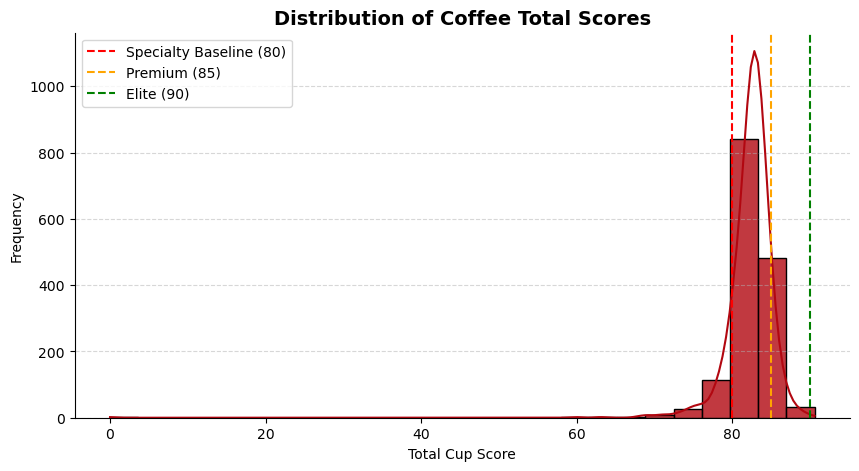

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['total_score'], bins=25, kde=True, color="#b20710", alpha=0.8)

# Specialty thresholds
plt.axvline(80, color='red', linestyle='--', linewidth=1.5, label="Specialty Baseline (80)")
plt.axvline(85, color='orange', linestyle='--', linewidth=1.5, label="Premium (85)")
plt.axvline(90, color='green', linestyle='--', linewidth=1.5, label="Elite (90)")

plt.title("Distribution of Coffee Total Scores", fontsize=14, weight='bold')
plt.xlabel("Total Cup Score")
plt.ylabel("Frequency")
plt.legend()
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()


**Insight:**  
- Most coffees fall between **80–85 points**, confirming that the dataset primarily covers specialty-grade coffee.  
- A smaller subset exceeds **85 points** (premium specialty), while **90+ elite coffees are very rare**.  
- This distribution mirrors real-world specialty coffee markets, where very high scores are uncommon and command premium prices.  


###  Top Countries by Coffee Quality

Next, we compare the **average total score by country**.  
To make results meaningful, we only include countries with at least **20 samples** in the dataset.  

This shows which origins consistently achieve higher quality on the SCA scale 
and can be positioned as **premium sources** in the coffee market.


C:\Users\Mustafa\AppData\Local\Temp\ipykernel_13204\267939188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


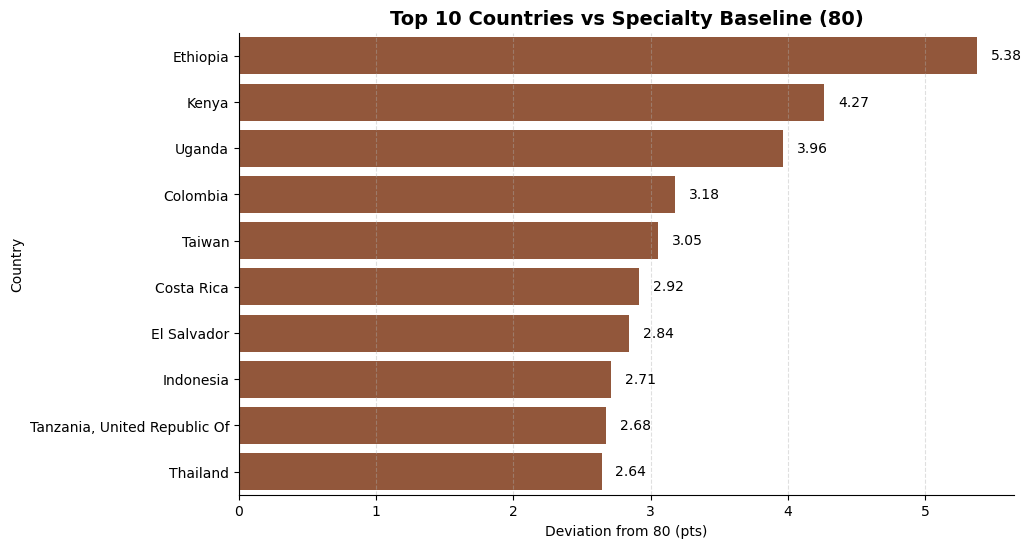

In [ ]:
plt.figure(figsize=(10,6))
baseline = 80

# Diverging bar plot with lighter shades
colors = ["#b20710" if v < 0 else "#a0522d" for v in country_quality.values - baseline]

ax = sns.barplot(
    x=country_quality.values - baseline,
    y=country_quality.index,
    palette=colors
)

# Baseline
plt.axvline(0, color="grey", linewidth=1.2, linestyle="--")

# Labels
for i, v in enumerate(country_quality.values - baseline):
    ax.text(v + 0.1 if v >= 0 else v - 0.3, i, f"{v:.2f}", 
            va='center', ha='left' if v >= 0 else 'right', 
            fontsize=10, color="black")

plt.title("Top 10 Countries vs Specialty Baseline (80)", fontsize=14, weight='bold')
plt.xlabel("Deviation from 80 (pts)")
plt.ylabel("Country")
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle="--", alpha=0.4)
plt.show()


**Insight:**  
- Ethiopia and Kenya clearly stand out, scoring 4–5 points above the specialty baseline, reinforcing their reputation as top-tier origins.

- Uganda and Colombia also perform strongly, averaging close to 3–4 points above the baseline.

- Taiwan emerges as an interesting specialty producer, ranking among the global leaders despite its smaller scale.

- Costa Rica, El Salvador, Indonesia, Tanzania, and Thailand also show solid specialty performance, though slightly closer to the baseline.

- This analysis highlights both traditional powerhouses (Ethiopia, Kenya, Colombia) and emerging origins (Taiwan, Thailand) as key options for premium sourcing.

### Flavor Fingerprints by Country
To compare sensory performance across origins, we plot **flavor profiles** of the top 5 producing countries on a radar chart.  
This highlights each country’s **strengths and trade-offs** across aroma, acidity, body, and balance.


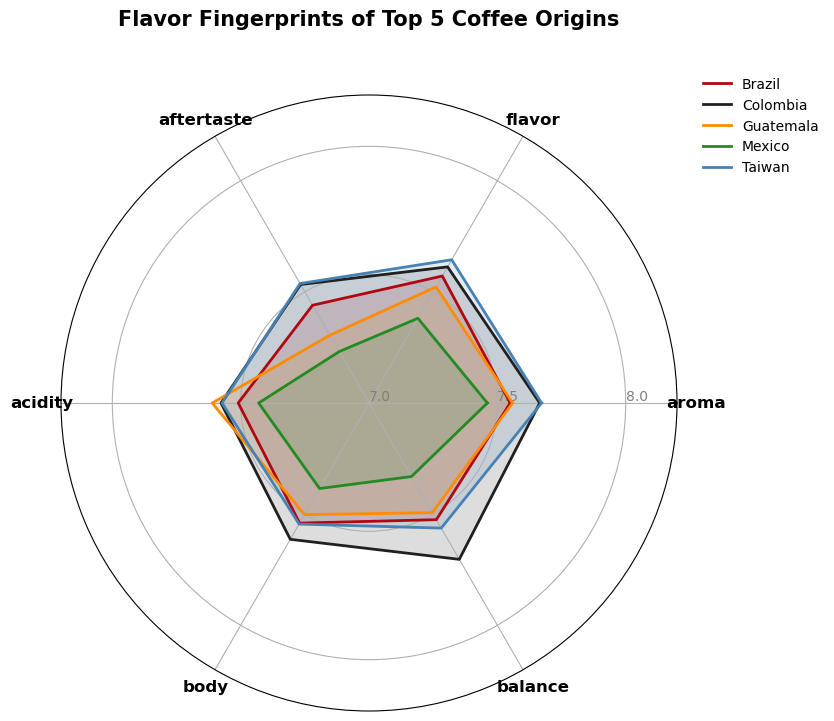

In [ ]:
from math import pi

top_countries = df['country'].value_counts().head(5).index

# Sensory attributes
flavor_cols = ['aroma','flavor','aftertaste','acidity','body','balance']
flavor_cols = [c for c in flavor_cols if c in df.columns]

# Average flavor scores
radar_data = df[df['country'].isin(top_countries)].groupby('country')[flavor_cols].mean()

# Radar chart setup
categories = list(radar_data.columns)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

# Softer, distinct palette
colors = ['#b20710','#221f1f','#FF8C00','#228B22','#4682B4']

for i, country in enumerate(radar_data.index):
    values = radar_data.loc[country].tolist()
    values += values[:1]  
    ax.plot(angles, values, linewidth=2, label=country, color=colors[i])
    ax.fill(angles, values, alpha=0.15, color=colors[i])  

# Labels & aesthetics
plt.xticks(angles[:-1], categories, fontsize=12, weight='bold')
ax.set_rlabel_position(0)
plt.yticks([7,7.5,8], ["7.0","7.5","8.0"], color="grey", size=10)
plt.ylim(7,8.2)   

plt.title("Flavor Fingerprints of Top 5 Coffee Origins", size=15, weight='bold', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.05), frameon=False)
plt.show()


**Insight:**  
- Colombia → Strong overall balance and consistently high scores across most attributes, making it a dependable specialty origin.

- Taiwan → Performs surprisingly well in aroma, flavor, and aftertaste, signaling its growing role as a premium niche producer in Asia.

- Brazil → Leads in body and balance, aligning with its reputation for chocolatey, smooth coffees ideal for blends.

- Guatemala → Shows strength in acidity and aftertaste, typical of Central American profiles prized for fruity, vibrant notes.

- Mexico → Lags slightly behind the others across attributes, but still delivers competitive acidity and body.  

- This confirms that origins offer **distinct flavor signatures**, which buyers can align with consumer demand in different markets.




Business view ----> These flavor fingerprints help buyers quickly compare sensory strengths by origin. For example, Brazil offers body for blends, Guatemala provides acidity for vibrant single-origins, and Taiwan positions itself as an emerging premium niche.

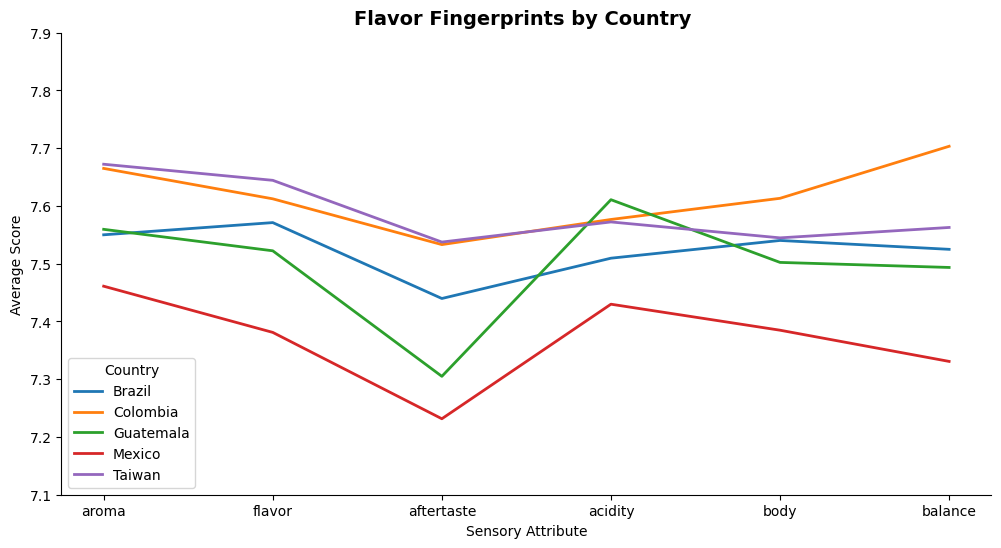

In [ ]:
flavor_cols = ['aroma','flavor','aftertaste','acidity','body','balance']
flavor_cols = [c for c in flavor_cols if c in df.columns]

top_countries = df['country'].value_counts().head(5).index

avg_flavors = df[df['country'].isin(top_countries)].groupby('country')[flavor_cols].mean().T

plt.figure(figsize=(12,6))

for country in avg_flavors.columns:
    plt.plot(avg_flavors.index, avg_flavors[country], linewidth=2, label=country)  

plt.title("Flavor Fingerprints by Country ", fontsize=14, weight='bold')
plt.xlabel("Sensory Attribute")
plt.ylabel("Average Score")
plt.ylim(7.1, 7.9)   
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.legend(title="Country")
sns.despine(top=True, right=True)
plt.grid(False)
plt.show()


Insight:
Although scores cluster tightly between 7.1–7.9, subtle differences matter. Colombia trends higher across most attributes, Guatemala edges ahead on acidity, while Brazil remains stronger on body and balance.

 - Business view --> Even small score variations (e.g., 0.2 points in acidity) can define whether a coffee is positioned as a specialty single-origin or used in blends.

## Processing Methods: Preparing the Data

Coffee undergoes different processing methods after harvest, which strongly influence flavor outcomes:

Washed (Wet) → clean, bright, acidic profiles.

Natural (Dry) → fruity, heavier body.

Honey / Pulped Natural → balance of sweetness and clarity.

Other experimental methods (semi-washed, anaerobic, etc.) appear but are rare in this dataset.

In the dataset:

Washed/Wet is by far the most common (over 900 samples).

Natural/Dry follows with ~300 samples.

Honey and Others make up small but interesting fractions.

Business view---> Since processing drives consumer preference, standardizing these categories (Washed, Natural, Honey, Other) ensures fair comparison across sensory scores.

In [ ]:
print("Unique values in process column:")
print(df['process'].dropna().unique())

print("\nProcess value counts:")
print(df['process'].value_counts(dropna=False))


Unique values in process column:
['Washed / Wet' 'Pulped Natural / Honey' 'Natural / Dry'
 'Semi-Washed / Semi-Pulped' 'Other' 'Semi Washed'
 'Double Carbonic Maceration / Natural' 'Wet Hulling' 'Anaerobico 1000H'
 'Honey,Mossto' 'Double Anaerobic Washed']

Process value counts:
process
Washed / Wet                            931
Natural / Dry                           293
NaN                                     157
Semi-Washed / Semi-Pulped                56
Pulped Natural / Honey                   40
Other                                    26
Semi Washed                               1
Double Carbonic Maceration / Natural      1
Wet Hulling                               1
Anaerobico 1000H                          1
Honey,Mossto                              1
Double Anaerobic Washed                   1
Name: count, dtype: int64


In [ ]:
flavor_cols = ['aroma','flavor','aftertaste','acidity','body','balance']
for col in flavor_cols:
    if col in df.columns:
        print(f"\n{col} — non-missing: {df[col].notna().sum()}, mean: {df[col].mean():.2f}")
    else:
        print(f"\n{col} — NOT FOUND in dataset")



aroma — non-missing: 1509, mean: 7.59

flavor — non-missing: 1509, mean: 7.55

aftertaste — non-missing: 1509, mean: 7.43

acidity — non-missing: 1509, mean: 7.55

body — non-missing: 1509, mean: 7.53

balance — non-missing: 1509, mean: 7.54


In [ ]:
process_map = {
    'Washed / Wet': 'Washed',
    'Natural / Dry': 'Natural',
    'Pulped Natural / Honey': 'Honey',
    'Semi-Washed / Semi-Pulped': 'Other',
    'Semi Washed': 'Other',
    'Wet Hulling': 'Other',
    'Double Carbonic Maceration / Natural': 'Other',
    'Double Anaerobic Washed': 'Other',
    'Anaerobico 1000H': 'Other',
    'Honey,Mossto': 'Other',
    'Other': 'Other'
}

df['process_clean'] = df['process'].map(process_map)


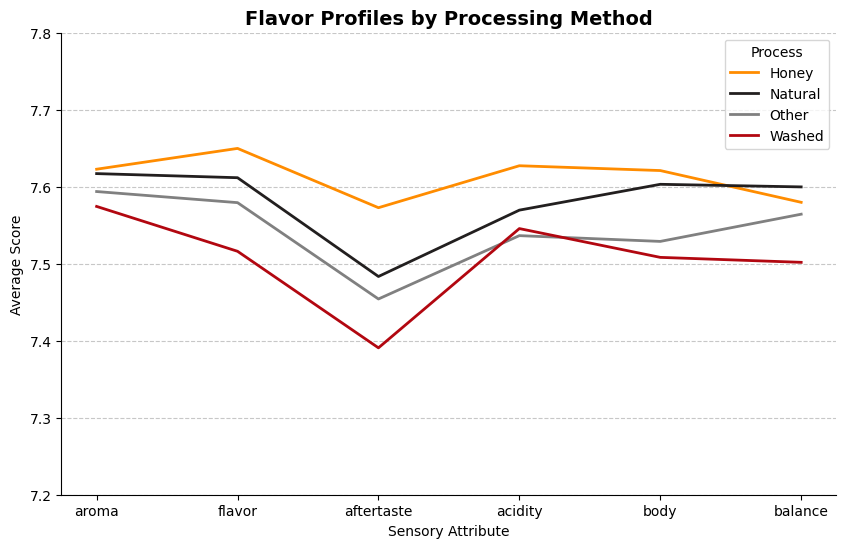

In [ ]:
colors = {
    'Washed': '#b20710',   # red
    'Natural': '#221f1f',  # black
    'Honey': '#FF8C00',    # orange
    'Other': 'grey'
}

flavor_cols = ['aroma','flavor','aftertaste','acidity','body','balance']
process_flavors = df.groupby('process_clean')[flavor_cols].mean()

# Plot
plt.figure(figsize=(10,6))
for process in process_flavors.index:
    plt.plot(
        flavor_cols,
        process_flavors.loc[process],
        linewidth=2,
        label=process,
        color=colors.get(process, 'grey')
    )

plt.title("Flavor Profiles by Processing Method", fontsize=14, weight='bold')
plt.xlabel("Sensory Attribute")
plt.ylabel("Average Score")
plt.ylim(7.2, 7.8)   # zoom 
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.legend(title="Process")
sns.despine(top=True, right=True)
plt.show()


### Chart compares how Washed, Natural, and Honey processes impact sensory attributes:

Washed coffees excel in acidity and balance.

Natural coffees lean toward body-heavy profiles.

Honey process sits in between, balancing sweetness and clarity.

Other methods are experimental and less represented.

 Business ---> Processing methods give roasters tools for blend design — washed for clean profiles, naturals for fruitier and heavier blends, honey for niche differentiation.

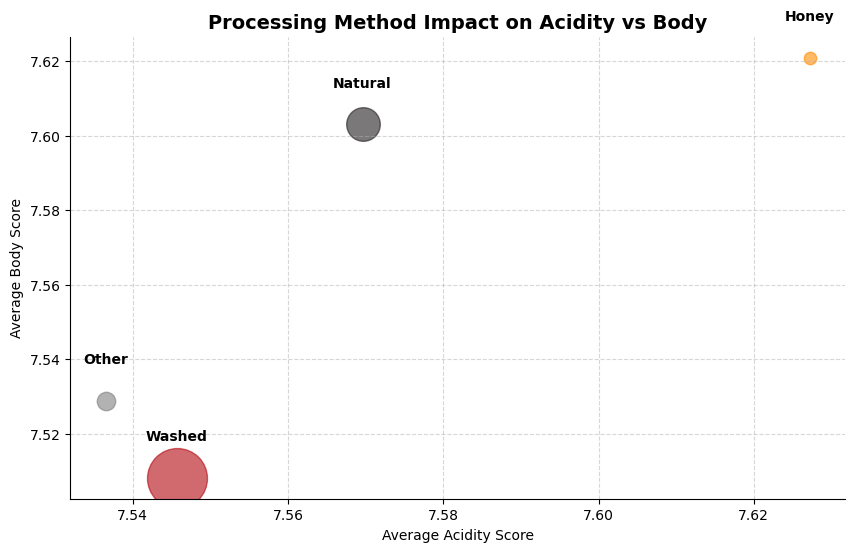

In [ ]:
colors = {
    'Washed': '#b20710',   # red
    'Natural': '#221f1f',  # black
    'Honey': '#FF8C00',    # orange
    'Other': 'grey'
}



process_summary = (
    df.groupby('process_clean')[flavor_cols]
      .mean()
      .reset_index()
)
process_summary['count'] = df['process_clean'].value_counts().reindex(process_summary['process_clean']).values

x_attr, y_attr = "acidity", "body"

plt.figure(figsize=(10,6))

for _, row in process_summary.iterrows():
    plt.scatter(
        row[x_attr], row[y_attr],
        s=row['count']*2,   
        color=colors.get(row['process_clean'],'grey'),
        alpha=0.6,
        label=row['process_clean']
    )
    plt.text(row[x_attr], row[y_attr]+0.01, row['process_clean'],
             ha='center', fontsize=10, weight='bold')

plt.title("Processing Method Impact on Acidity vs Body", fontsize=14, weight='bold')
plt.xlabel("Average Acidity Score")
plt.ylabel("Average Body Score")
plt.grid(axis='both', linestyle="--", alpha=0.5)
sns.despine(top=True, right=True)
plt.show()


Insight:

- Washed coffees dominate in sample size and deliver strong acidity with good body.

- Natural coffees lean heavier in body but slightly lower in acidity.

- Honey coffees strike a balance, though they remain niche.

- Other processes are rare but show experimental potential.

 Business view---> This visualization helps roasters balance blend design — e.g., sourcing naturals to boost body in espresso blends while washed coffees deliver acidity for pour-overs.

## Altitude vs Coffee Quality

This scatterplot shows the relationship between altitude and cup quality:

Higher altitudes (>1500m) generally correlate with higher scores, confirming specialty coffee expectations.

The regression line (black) shows a positive trend: as altitude increases, so does the likelihood of premium scores.

Lower altitude coffees (<1000m) are more common but tend to score closer to the specialty baseline (80).

 Business view: This insight highlights the value of high-altitude sourcing. Buyers seeking premium, complex coffees should prioritize regions above 1500m, while lower altitudes may suit commercial blends.

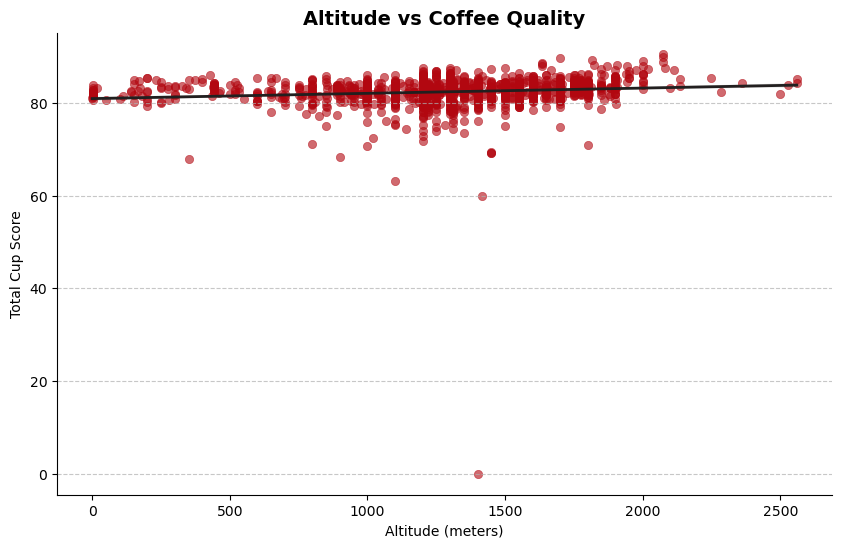

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='altitude_m', y='total_score', data=df, alpha=0.6, color="#b20710", edgecolor=None)
sns.regplot(x='altitude_m', y='total_score', data=df, scatter=False, color="#221f1f", line_kws={"linewidth":2})

plt.title("Altitude vs Coffee Quality", fontsize=14, weight='bold')
plt.xlabel("Altitude (meters)")
plt.ylabel("Total Cup Score")
plt.grid(axis='y', linestyle="--", alpha=0.7)
sns.despine(top=True, right=True)
plt.show()


“This chart shows that higher-altitude coffees tend to achieve higher quality scores. While there are exceptions, the trend is clear: coffees grown above 1,500 meters are generally more complex and vibrant. This explains why regions like Ethiopia, Colombia, and Central America — with many high-altitude farms — dominate premium specialty markets.”

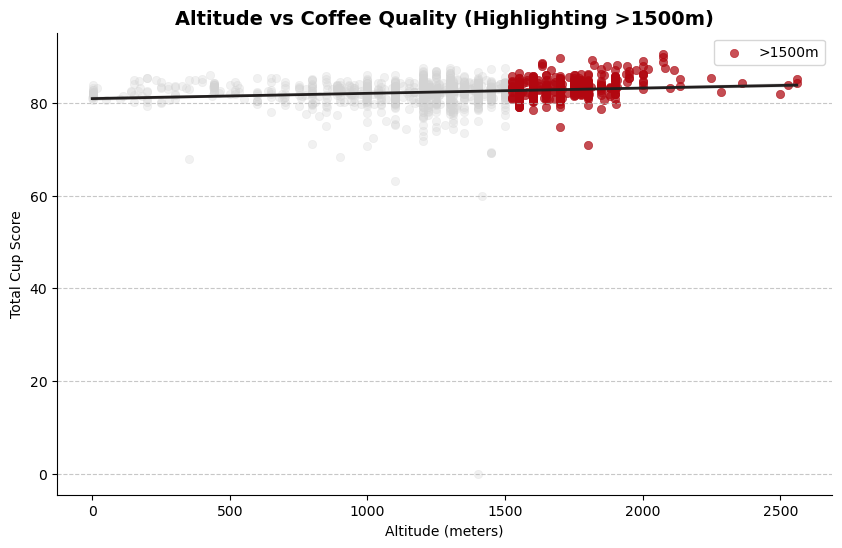

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x='altitude_m', y='total_score',
    data=df, alpha=0.3, color="lightgrey", edgecolor=None
)

sns.scatterplot(
    x='altitude_m', y='total_score',
    data=df[df['altitude_m'] > 1500],
    alpha=0.7, color="#b20710", edgecolor=None, label=">1500m"
)

sns.regplot(
    x='altitude_m', y='total_score',
    data=df, scatter=False,
    color="#221f1f", line_kws={"linewidth":2}
)

plt.title("Altitude vs Coffee Quality (Highlighting >1500m)", fontsize=14, weight='bold')
plt.xlabel("Altitude (meters)")
plt.ylabel("Total Cup Score")
plt.grid(axis='y', linestyle="--", alpha=0.7)
sns.despine(top=True, right=True)
plt.legend()
plt.show()


High-Altitude Advantage

By highlighting coffees grown above 1500 meters (red), the trend becomes clearer:

These high-altitude lots consistently achieve higher cup scores, clustering well above the specialty threshold.

Coffees below 1500m (grey) dominate in volume but show flatter quality trends.

 Business view ---> This evidence supports premium pricing strategies for high-altitude origins. Buyers can justify higher costs to consumers by linking altitude with quality, flavor complexity, and rarity.

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_13204\3417230731.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


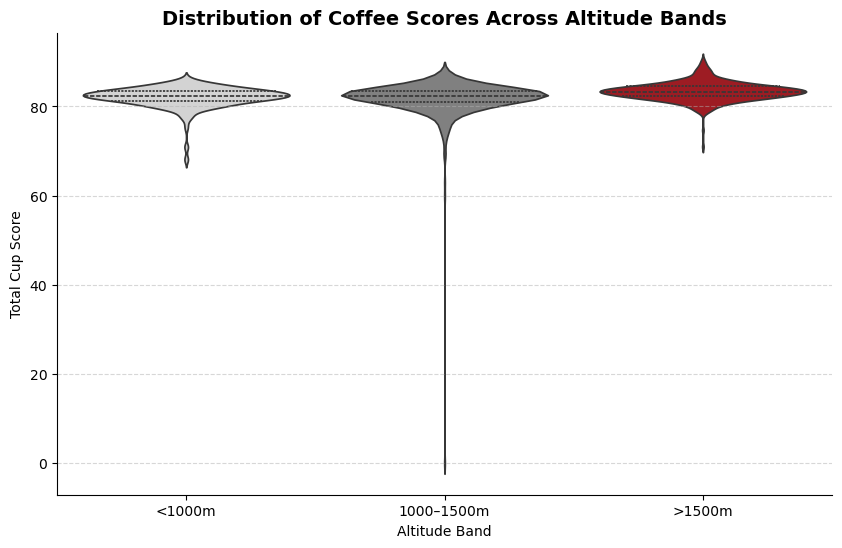

In [ ]:
# Define altitude bands
df['altitude_band'] = pd.cut(
    df['altitude_m'],
    bins=[0, 1000, 1500, 2500],
    labels=['<1000m','1000–1500m','>1500m']
)

plt.figure(figsize=(10,6))

sns.violinplot(
    x='altitude_band', y='total_score',
    data=df, palette=['#d3d3d3','#808080','#b20710'],
    inner='quartile'
)

plt.title("Distribution of Coffee Scores Across Altitude Bands", fontsize=14, weight='bold')
plt.xlabel("Altitude Band")
plt.ylabel("Total Cup Score")
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()


### Distribution of Coffee Quality by Altitude Band

This violin plot reveals how coffee quality varies across three key altitude ranges:

<1000m: Lower scores and wider variability, with many falling below the specialty threshold.

1000–1500m: More consistent quality, clustering around the 80–84 range.

>1500m: Highest scores overall, with a tighter, more reliable distribution, reinforcing the premium positioning of high-altitude coffees.

 Business view---> This deeper view supports risk management in sourcing. Buyers investing in >1500m coffees gain both higher average quality and greater consistency, reducing the risk of underperforming lots.

##  Coffee Varieties and Quality

Coffee variety plays a role similar to grape varietals in wine: it influences flavor, aroma, and quality potential.  
Certain varieties like **Typica, Bourbon, and SL28** are known for producing high-scoring coffees, while others are more common but less distinctive.  

We compare the **average total score of the top 10 most common varieties** in the dataset.


In [ ]:
# Clean up variety names
df['variety_clean'] = (
    df['variety']
    .astype(str)
    .str.strip()
    .str.title()
    .replace({'Nan': None, 'None': None})
)


In [ ]:
# Average score by country-variety
variety_country = (
    df.groupby(['country','variety_clean'])['total_score']
      .mean()
      .reset_index()
)


In [ ]:
top_countries = df['country'].value_counts().head(5).index
variety_country = variety_country[variety_country['country'].isin(top_countries)]


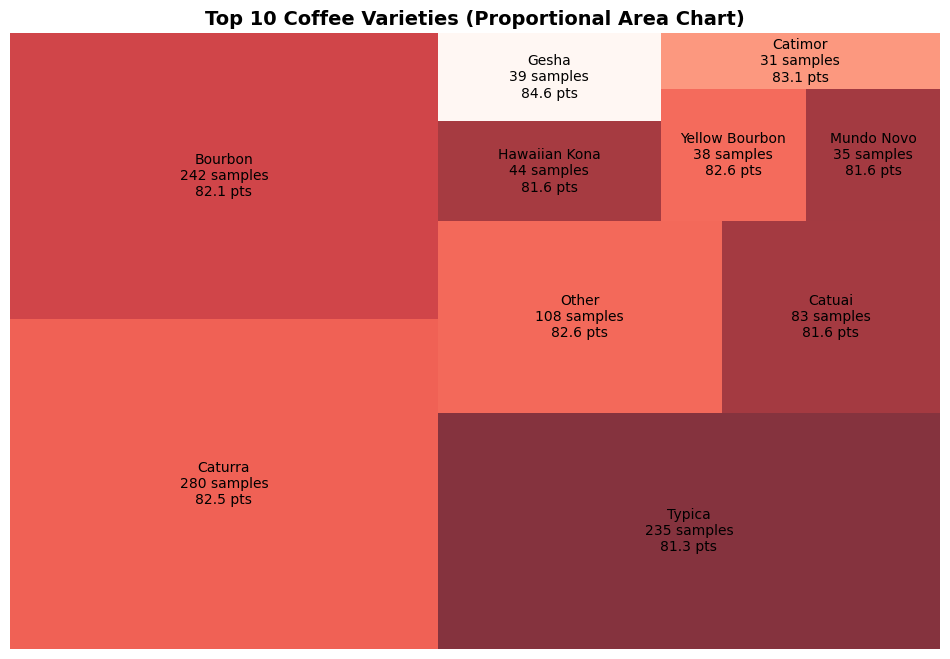

In [ ]:
import squarify  

df['variety_clean'] = (
    df['variety']
    .astype(str)
    .str.strip()
    .str.title()
    .replace({'Nan': None, 'None': None})
)

variety_stats = (
    df.groupby('variety_clean')
      .agg(count=('total_score','size'), avg_score=('total_score','mean'))
      .sort_values(by='count', ascending=False)
      .head(10)
)

sizes = variety_stats['count'].values
colors = variety_stats['avg_score'].values
labels = [f"{v}\n{c} samples\n{round(s,1)} pts"
          for v, c, s in zip(variety_stats.index, sizes, colors)]

plt.figure(figsize=(12,8))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=plt.cm.Reds_r((colors - colors.min())/(colors.max()-colors.min())),
    alpha=0.8,
    text_kwargs={'fontsize':10}
)

plt.title("Top 10 Coffee Varieties (Proportional Area Chart)", fontsize=14, weight='bold')
plt.axis('off')
plt.show()



## Top 10 Coffee Varieties by Sample Size and Quality

 This treemap shows the ten most common coffee varieties in the dataset:
   - The area of each block represents the number of samples for that variety.
   - The color intensity represents the average cup score (darker = higher quality).

Key takeaways:

-  Popular, foundational varieties such as Typica and Bourbon dominate sample counts, reflecting their global role in specialty production.

- Some less common varieties (e.g., Pacamara, Geisha) show darker shading, meaning fewer samples but consistently high quality.

- The mix of volume vs quality reveals a trade-off: not all high-volume varieties are the highest scoring.

 Business view ---> 
 Roasters and importers can use this insight to balance sourcing strategy:
- High-volume varieties for stable supply chains.
- High-scoring niche varieties to create premium, differentiated products.

## Processing Methods by Country
Processing Methods in Top Coffee-Producing Countries (Refined View)

This chart gives a cleaner comparison of processing methods by country:
- Washed coffees dominate in Colombia and Honduras.
- Natural process is stronger in Brazil, aligning with its large-scale sun-drying infrastructure.
- Honey process appears mainly in Taiwan ad per my data, but still represents a small share.
- Other experimental methods are rare but emerging.

Business view ---> This refined view makes it easier for buyers to spot which countries specialize in certain processing methods, guiding strategic sourcing.

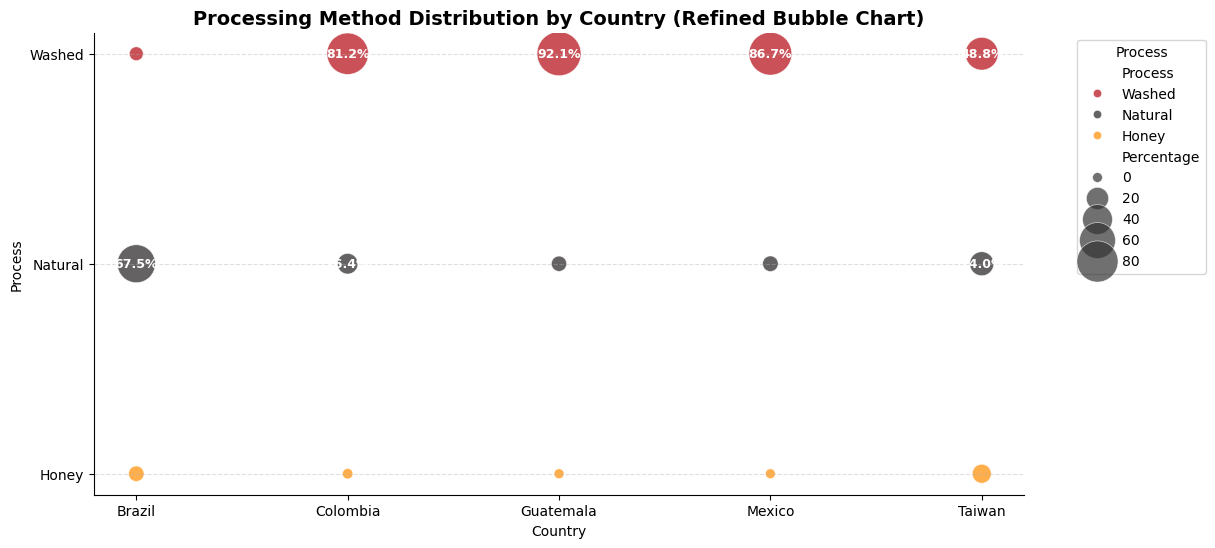

In [ ]:
df_long = (
    country_process_pct[['Washed','Natural','Honey']]
    .reset_index()
    .melt(id_vars='country', var_name='Process', value_name='Percentage')
)

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_long,
    x='country', y='Process',
    size='Percentage', hue='Process',
    sizes=(50, 1000),
    palette={'Washed':'#b20710','Natural':'#221f1f','Honey':'#FF8C00'},
    alpha=0.7, edgecolor="white", linewidth=0.5
)

for i, row in df_long.iterrows():
    if row['Percentage'] > 15:  # label only larger bubbles
        plt.text(
            row['country'], row['Process'],
            f"{row['Percentage']:.1f}%",
            ha='center', va='center', color='white',
            fontsize=9, weight='bold'
        )

plt.title("Processing Method Distribution by Country (Refined Bubble Chart)", fontsize=14, weight='bold')
plt.xlabel("Country")
plt.ylabel("Process")
plt.legend(title="Process", bbox_to_anchor=(1.05,1), loc="upper left")
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle="--", alpha=0.4)
plt.show()


##  Country-Level Coffee Quality

While looked at processing, altitude, and varieties, the ultimate question for buyers is:  

**Which origins deliver the highest overall quality?**

This comparison shows the average cup scores for the top 10 producing countries.  
It highlights where exceptional coffees are more common and where quality is more consistent.


C:\Users\Mustafa\AppData\Local\Temp\ipykernel_13204\3231168577.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


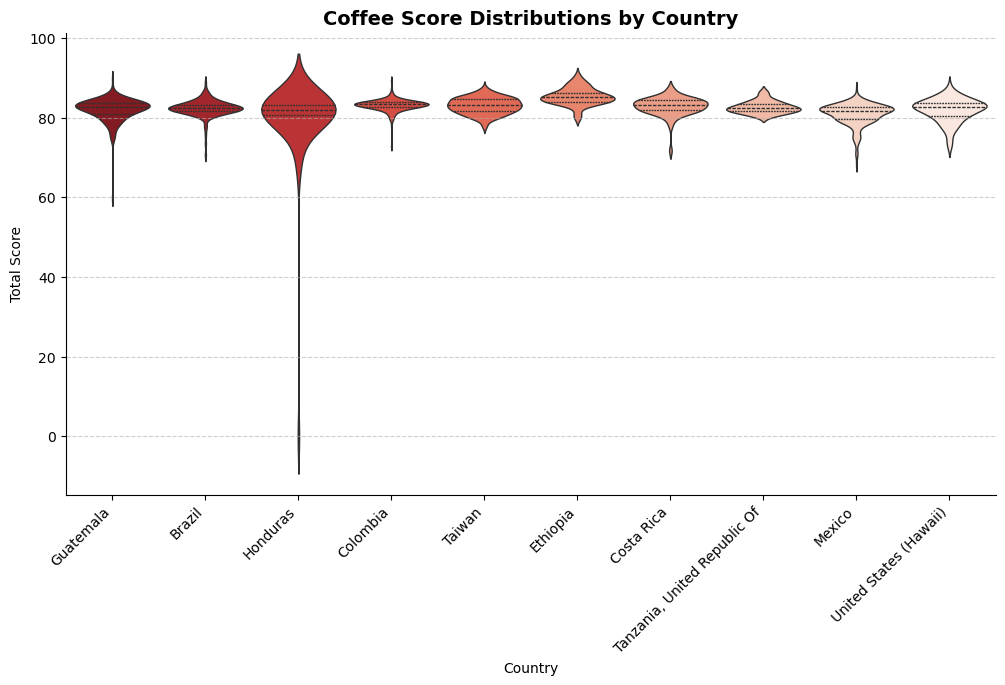

In [ ]:
# Top 10 producing countries
top_countries = df['country'].value_counts().head(10).index
subset = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.violinplot(
    x='country',
    y='total_score',
    data=subset,
    palette="Reds_r",
    inner="quartile",
    linewidth=1
)

plt.title("Coffee Score Distributions by Country", fontsize=14, weight='bold')
plt.ylabel("Total Score")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


### Coffee Quality Distributions by Country

- Colombia and Guatemala → tight, consistent scores above specialty threshold → reliable origins.

- Brazil → broader spread → produces both specialty and commercial-grade lots.

- Taiwan and Honduras → competitive medians, showing strong specialty performance.

- Outliers → reflect variability in farm practices and post-harvest methods.

 Business view ---> This visualization helps buyers assess risk and consistency. A tighter distribution suggests reliable sourcing, while wider distributions signal both opportunities for exceptional lots and risks of inconsistency.

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_13204\4026151609.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


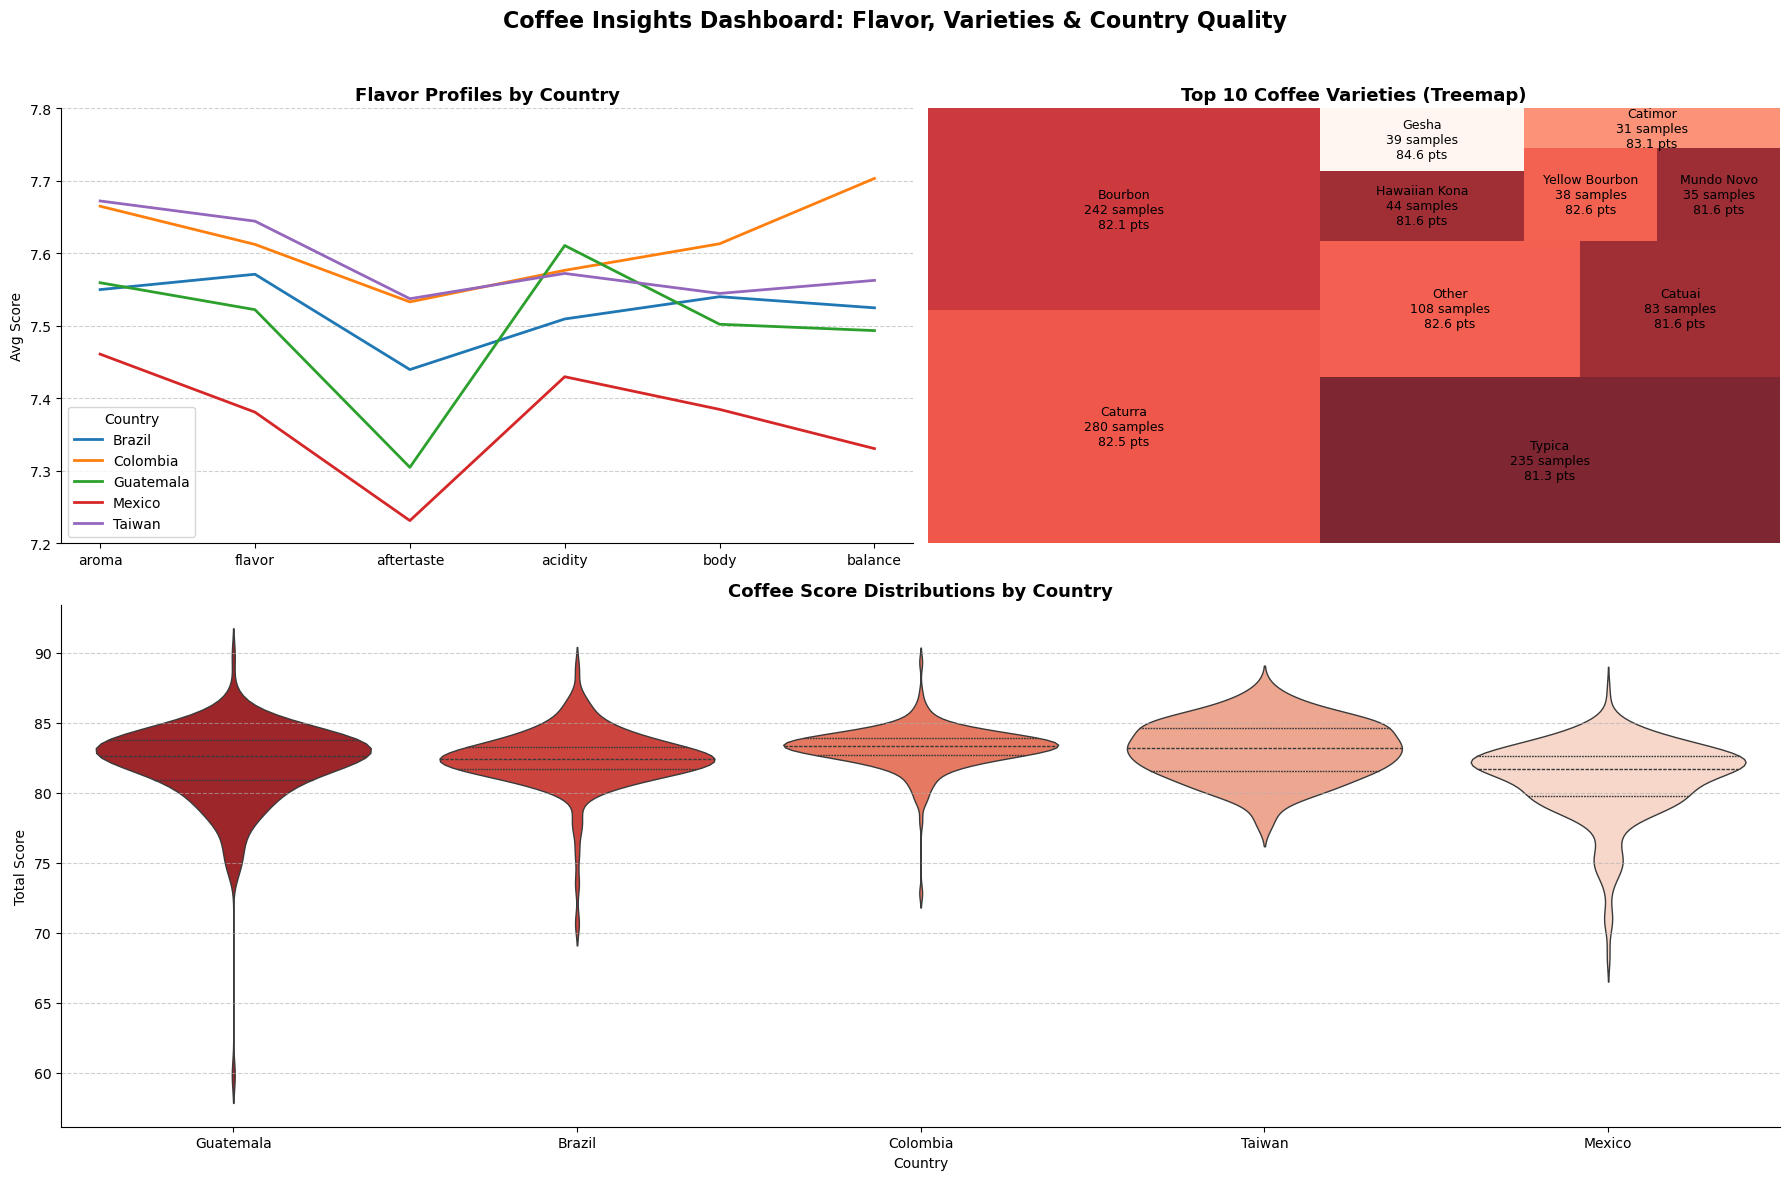

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18,12))
gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[1,1.2])

ax1 = fig.add_subplot(gs[0,0])

flavor_cols = ['aroma','flavor','aftertaste','acidity','body','balance']
top_countries = df['country'].value_counts().head(5).index
avg_flavors = (
    df[df['country'].isin(top_countries)]
    .groupby('country')[flavor_cols]
    .mean()
    .T
)

for country in avg_flavors.columns:
    ax1.plot(avg_flavors.index, avg_flavors[country], linewidth=2, label=country)

ax1.set_title("Flavor Profiles by Country", fontsize=13, weight='bold')
ax1.set_ylabel("Avg Score")
ax1.set_ylim(7.2, 7.8)
ax1.grid(axis='y', linestyle="--", alpha=0.6)
ax1.legend(title="Country")
sns.despine(ax=ax1, top=True, right=True)

ax2 = fig.add_subplot(gs[0,1])

variety_stats = (
    df.groupby('variety_clean')
      .agg(count=('total_score','size'), avg_score=('total_score','mean'))
      .sort_values(by='count', ascending=False)
      .head(10)
)

sizes = variety_stats['count'].values
colors = plt.cm.Reds_r(
    (variety_stats['avg_score'] - variety_stats['avg_score'].min()) / 
    (variety_stats['avg_score'].max() - variety_stats['avg_score'].min())
)
labels = [
    f"{v}\n{c} samples\n{round(s,1)} pts"
    for v, c, s in zip(variety_stats.index, variety_stats['count'], variety_stats['avg_score'])
]

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.85, ax=ax2, text_kwargs={'fontsize':9})
ax2.set_title("Top 10 Coffee Varieties (Treemap)", fontsize=13, weight='bold')
ax2.axis("off")

ax3 = fig.add_subplot(gs[1,:])

subset = df[df['country'].isin(top_countries)]
sns.violinplot(
    x='country', y='total_score', data=subset,
    palette="Reds_r", inner="quartile", linewidth=1, ax=ax3
)
ax3.set_title("Coffee Score Distributions by Country", fontsize=13, weight='bold')
ax3.set_xlabel("Country")
ax3.set_ylabel("Total Score")
ax3.grid(axis='y', linestyle="--", alpha=0.6)
sns.despine(ax=ax3, top=True, right=True)

fig.suptitle("Coffee Insights Dashboard: Flavor, Varieties & Country Quality", fontsize=16, weight='bold')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()



## Coffee Insights Dashboard: Flavor, Varieties & Country Quality

Integrated dashboard brings together three perspectives on coffee quality:

### Flavor Profiles by Country (top-left)

- Compares key sensory attributes (aroma, flavor, aftertaste, acidity, body, balance) across the top producing countries.

- Highlights how origins differ in strengths and weaknesses, guiding sourcing for blends or single-origin coffees.

### Top 10 Coffee Varieties (Treemap, top-right)

- Visualizes both volume (area) and quality (color intensity) of major coffee varieties.

- Shows that foundational varieties like Typica and Bourbon dominate, but premium varieties like Geisha consistently achieve higher scores.

### Country Quality Distributions (Violin Plot, bottom)

- Reveals consistency vs variability of scores across countries.

- Countries like Colombia and Guatemala show reliable quality, while Brazil demonstrates wider variability due to scale.

 ### Business view ---> 
 
 Together, these views provide a data-driven sourcing model:
- Pick countries for specific flavor profiles.Focus on varieties that align with premium branding.
  Manage risk and consistency by understanding distribution of scores.

---



# Conclusion

Analyzed Arabica coffee quality data to uncover actionable sourcing strategies for buyers and roasters in the specialty market.  By examining countries, varieties, processing methods, and altitude, we identified clear patterns that link farming practices to cup quality.


### Origin Strategy  
- Ethiopia, Kenya, and Colombia consistently achieve high scores, making them ideal for premium single-origin offerings.  
- Brazil remains the largest producer and is best leveraged for blends due to its scale but variable quality.  
- Guatemala and Honduras provide reliable quality and acidity-driven profiles suitable for specialty pour-overs.  

### Processing Method Strategy  
- Washed coffees dominate globally, delivering clean and balanced flavor profiles.  
- Natural processing produces heavier body and fruity profiles, with Brazil leading in this method.  
- Honey processing remains niche but provides opportunities for differentiation in specialty markets.  

### Altitude Advantage  
- Coffees grown above 1500 meters achieve consistently higher and more reliable scores.  
- This supports their premium positioning in global markets and justifies higher pricing strategies.  

### Variety Selection  
- Typica and Bourbon dominate global supply and maintain strong quality performance, ensuring stability for large-scale sourcing.  
- Premium varieties such as Geisha and Pacamara achieve some of the highest scores, making them suitable as flagship or high-margin offerings.  

---

### Business Recommendation  
An AI-driven sourcing model that incorporates origin, process, variety, and altitude can help buyers:  
- Prioritize high-scoring lots for premium markets.  
- Balance portfolios with both consistent blends and niche specialty coffees.  
- Manage sourcing risk by understanding variability in quality distributions.  

This approach ensures data-driven purchasing decisions that maximize both quality consistency and market differentiation in the competitive specialty coffee sector.
